In [41]:
import requests
import json
from config import api_key_census
import census
from census import Census
import pandas as pd
import matplotlib.pyplot as plt
import us
from us import states
from scipy.stats import linregress

In [14]:
# Median house value and monthly cost for year 2017
c_value_cost_2017 = Census(api_key_census, year=2017)
census_value_cost_2017 = c_value_cost_2017.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})


In [16]:
# Convert to DataFrame
census_value_cost_2017 = pd.DataFrame(census_value_cost_2017)

# Column Reordering
census_value_cost_2017 = census_value_cost_2017.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2017 = census_value_cost_2017[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]

# Visualize
print(len(census_value_cost_2017))

# Save to csv
#census_value_cost_2017.to_csv('C:\workspace\Resources\HH_ValueCost_NN.csv',index=False)

census_value_cost_2017

133


,Zipcode,Total Housing Unit,Median Value,Lower value quartile (dollars),Upper value quartile (dollars),Median monthly housing costs
0,77003,5292.0,272800.0,145300.0,344200.0,1209.0
1,77375,17383.0,168300.0,131600.0,239900.0,1295.0
2,77002,4237.0,233000.0,126500.0,299900.0,1439.0
3,77091,11166.0,110900.0,69000.0,180700.0,751.0
4,77024,16770.0,898100.0,442700.0,1615900.0,2046.0
...,...,...,...,...,...,...
128,77089,18185.0,137400.0,106000.0,171400.0,1140.0
129,77033,10416.0,62400.0,44900.0,78100.0,625.0
130,77064,17181.0,143000.0,107800.0,193900.0,1168.0
131,77099,18293.0,105700.0,86900.0,125600.0,889.0


In [17]:
# Cleaning up invalid values
census_value_cost_2017.sort_values('Median Value')

,Zipcode,Total Housing Unit,Median Value,Lower value quartile (dollars),Upper value quartile (dollars),Median monthly housing costs
132,77201,0.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0
46,77010,862.0,-666666666.0,350000.0,912500.0,3096.0
72,77507,0.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0
114,77028,6728.0,56200.0,40300.0,79500.0,578.0
16,77016,11094.0,60600.0,43500.0,82700.0,597.0
...,...,...,...,...,...,...
119,77056,13256.0,631800.0,304700.0,1035500.0,1740.0
96,77027,10763.0,679000.0,376500.0,1109200.0,1555.0
66,77401,7403.0,802300.0,538000.0,1050700.0,2368.0
4,77024,16770.0,898100.0,442700.0,1615900.0,2046.0


In [18]:
census_value_cost_2017_final=census_value_cost_2017.drop([132,46,72])
census_value_cost_2017_final.sort_values('Median Value')

,Zipcode,Total Housing Unit,Median Value,Lower value quartile (dollars),Upper value quartile (dollars),Median monthly housing costs
114,77028,6728.0,56200.0,40300.0,79500.0,578.0
16,77016,11094.0,60600.0,43500.0,82700.0,597.0
95,77026,9707.0,62100.0,44000.0,84700.0,602.0
129,77033,10416.0,62400.0,44900.0,78100.0,625.0
36,77547,2889.0,67400.0,56300.0,84800.0,685.0
...,...,...,...,...,...,...
119,77056,13256.0,631800.0,304700.0,1035500.0,1740.0
96,77027,10763.0,679000.0,376500.0,1109200.0,1555.0
66,77401,7403.0,802300.0,538000.0,1050700.0,2368.0
4,77024,16770.0,898100.0,442700.0,1615900.0,2046.0


In [31]:
# Median house value and monthly cost for year 2016
c_value_cost_2016 = Census(api_key_census, year=2016)
census_value_cost_2016 = c_value_cost_2016.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})
# Convert to DataFrame
census_value_cost_2016 = pd.DataFrame(census_value_cost_2016)

# Column Reordering
census_value_cost_2016 = census_value_cost_2016.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2016 = census_value_cost_2016[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]
# Cleaning up invalid values
census_value_cost_2016_final=census_value_cost_2016.drop([98,124,11])

In [37]:
# Median house value and monthly cost for year 2015
c_value_cost_2015 = Census(api_key_census, year=2015)
census_value_cost_2015 = c_value_cost_2015.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})
# Convert to DataFrame
census_value_cost_2015 = pd.DataFrame(census_value_cost_2015)

# Column Reordering
census_value_cost_2015 = census_value_cost_2015.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2015 = census_value_cost_2015[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]
# Cleaning up invalid values
#census_value_cost_2015.sort_values("Median Value")
census_value_cost_2015_final=census_value_cost_2015.drop([95,121])

In [63]:
# Median house value and monthly cost for year 2015
c_value_cost_2014 = Census(api_key_census, year=2014)
census_value_cost_2014 = c_value_cost_2014.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})
# Convert to DataFrame
census_value_cost_2014 = pd.DataFrame(census_value_cost_2014)

# Column Reordering
census_value_cost_2014 = census_value_cost_2014.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2014 = census_value_cost_2014[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]
# Cleaning up invalid values
census_value_cost_2014_final=census_value_cost_2014.drop([132,106,19])

In [69]:
# Median house value and monthly cost for year 2013
c_value_cost_2013 = Census(api_key_census, year=2013)
census_value_cost_2013 = c_value_cost_2013.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})
# Convert to DataFrame
census_value_cost_2013 = pd.DataFrame(census_value_cost_2013)

# Column Reordering
census_value_cost_2013 = census_value_cost_2013.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2013 = census_value_cost_2013[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]
# Cleaning up invalid values
#census_value_cost_2013.sort_values("Median Value")
census_value_cost_2013_final=census_value_cost_2013.drop([126,13,100])

In [75]:
# Median house value and monthly cost for year 2012
c_value_cost_2012 = Census(api_key_census, year=2012)
census_value_cost_2012 = c_value_cost_2012.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})
# Convert to DataFrame
census_value_cost_2012 = pd.DataFrame(census_value_cost_2012)

# Column Reordering
census_value_cost_2012 = census_value_cost_2012.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2012 = census_value_cost_2012[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]
# Cleaning up invalid values
#census_value_cost_2012.sort_values("Median Value")
census_value_cost_2012_final=census_value_cost_2012.drop([27,114,7])

In [82]:
# Median house value and monthly cost for year 2011
c_value_cost_2011 = Census(api_key_census, year=2011)
census_value_cost_2011 = c_value_cost_2011.acs5.get(("NAME","B25001_001E","B25077_001E","B25105_001E","B25076_001E","B25078_001E"), {'for': 'zip code tabulation area:77484,77001,    77002,    77003,    77004,    77005,    77005,    77006,    77007,    77008,    77009,    77010,    77011,    77012,    77013,    77014,    77015,    77016,    77017,    77018,    77019,    77020,    77021,    77022,    77023,    77024,    77025,    77026,    77027,    77028,    77029,    77029,    77030,    77030,    77031,    77032,    77033,    77034,    77035,    77036,    77037,    77038,    77039,    77040,    77040,    77041,    77041,    77042,    77043,    77044,    77045,    77046,    77046,    77047,    77048,    77049,    77050,    77051,    77052,    77054,    77055,    77056,    77057,    77058,    77059,    77060,    77061,    77062,    77063,    77064,    77065,    77065,    77066,    77067,    77068,    77069,    77070,    77071,    77072,    77073,    77074,    77075,    77076,    77077,    77078,    77079,    77080,    77081,    77082,    77083,    77084,    77085,    77086,    77087,    77088,    77089,    77090,    77091,    77092,    77093,    77094,    77095,    77096,    77097,    77098,    77099,    77201,    77202,    77203,    77205,    77206,    77207,    77208,    77210,    77213,    77215,    77217,    77218,    77219,    77220,    77221,    77222,    77223,    77224,    77225,    77226,    77227,    77228,    77229,    77230,    77231,    77233,    77234,    77235,    77236,    77237,    77238,    77240,    77241,    77242,    77243,    77244,    77245,    77248,    77249,    77251,    77252,    77253,    77254,    77255,    77256,    77257,    77258,    77259,    77261,    77262,    77263,    77265,    77266,    77267,    77268,    77269,    77270,    77271,    77272,    77273,    77274,    77275,    77277,    77279,    77280,    77281,    77282,    77284,    77287,    77288,    77289,    77290,    77291,    77292,    77293,    77315,    77325,    77325,    77336,    77337,    77337,    77338,    77339,    77339,    77345,    77345,    77346,    77346,    77346,    77347,    77373,    77375,    77377,    77379,    77379,    77383,    77388,    77389,    77389,    77391,    77396,    77401,    77402,    77410,    77411,    77413,    77429,    77433,    77447,    77449,    77449,    77450,    77450,    77491,    77492,    77493,    77493,    77501,    77502,    77503,    77504,    77505,    77506,    77507,    77508,    77520,    77521,    77522,    77530,    77532,    77532,    77536,    77547,    77562,    77571,    77571,    77572,    77586,    77586,    77586,    77587, 77598'})
# Convert to DataFrame
census_value_cost_2011 = pd.DataFrame(census_value_cost_2011)

# Column Reordering
census_value_cost_2011 = census_value_cost_2011.rename(columns={"B25077_001E": "Median Value",
                                                                "B25001_001E": "Total Housing Unit",
                                                                "B25076_001E": "Lower value quartile (dollars)",
                                                                "B25105_001E": "Median monthly housing costs",
                                                                "B25078_001E": "Upper value quartile (dollars)",
                                                                        "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_value_cost_2011 = census_value_cost_2011[["Zipcode",
                                                 "Total Housing Unit",
                                                 "Median Value",
                                                "Lower value quartile (dollars)",
                                                "Upper value quartile (dollars)",
                                                "Median monthly housing costs"]]
# Cleaning up invalid values
#census_value_cost_2011.sort_values("Median Value")
census_value_cost_2011_final=census_value_cost_2011.drop([121,95,8])

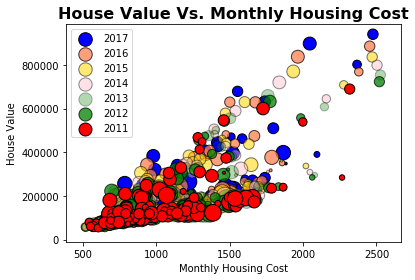

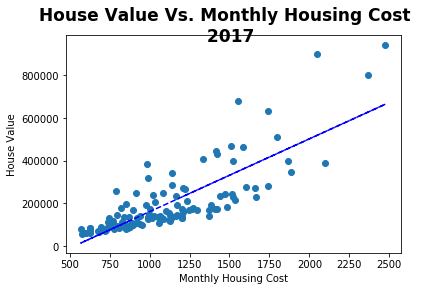

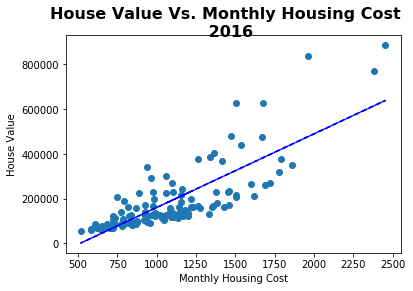

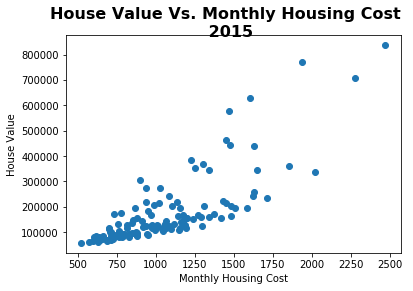

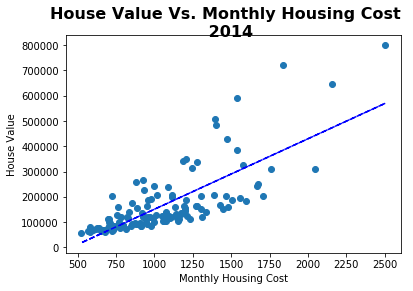

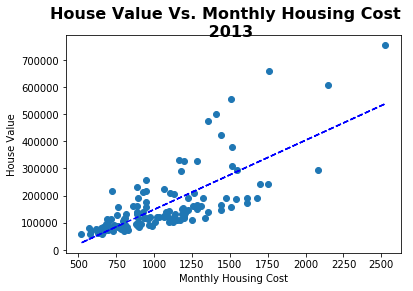

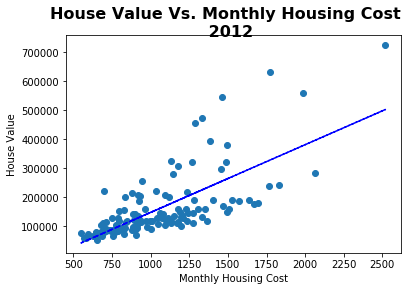

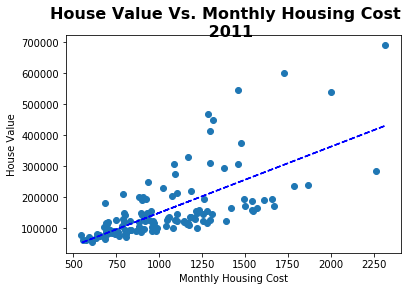

In [93]:
plt.scatter(census_value_cost_2017_final["Median monthly housing costs"],
           census_value_cost_2017_final["Median Value"],
           s=census_value_cost_2017_final["Total Housing Unit"]/100,
           edgecolor= "black", label="2017",
           c="blue")
plt.scatter(census_value_cost_2016_final["Median monthly housing costs"],
           census_value_cost_2016_final["Median Value"],
           s=census_value_cost_2016_final["Total Housing Unit"]/100,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
plt.scatter(census_value_cost_2015_final["Median monthly housing costs"],
           census_value_cost_2015_final["Median Value"],
           s=census_value_cost_2015_final["Total Housing Unit"]/100,
           edgecolor= "black",label="2015",
           c="gold", alpha=0.55)
plt.scatter(census_value_cost_2014_final["Median monthly housing costs"],
           census_value_cost_2014_final["Median Value"],
           s=census_value_cost_2014_final["Total Housing Unit"]/100,
           edgecolor= "black",label="2014",
           c="pink", alpha=0.45)
plt.scatter(census_value_cost_2013_final["Median monthly housing costs"],
           census_value_cost_2013_final["Median Value"],
           s=census_value_cost_2013_final["Total Housing Unit"]/100,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
plt.scatter(census_value_cost_2012_final["Median monthly housing costs"],
           census_value_cost_2012_final["Median Value"],
           s=census_value_cost_2012_final["Total Housing Unit"]/100,
           edgecolor= "black",label="2012",
           c="green", alpha=0.75)
plt.scatter(census_value_cost_2011_final["Median monthly housing costs"],
           census_value_cost_2011_final["Median Value"],
           s=census_value_cost_2011_final["Total Housing Unit"]/100,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
plt.title("House Value Vs. Monthly Housing Cost", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Cost")
plt.ylabel("House Value")
plt.legend(loc='best')

plt.savefig('C:\workspace\Resources\CostvsValue2011to2017.png')

# Set line 2017
(slope, intercept, _, _, _) = linregress(census_value_cost_2017_final["Median monthly housing costs"],census_value_cost_2017_final["Median Value"])
fit = slope * census_value_cost_2017_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2017", fontsize=17, fontweight="bold")


ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2017_final["Median monthly housing costs"], census_value_cost_2017_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2017_final["Median monthly housing costs"], fit, 'b--')

plt.savefig('C:\workspace\Resources\CostvsValue2017.png')

# Set line
(slope, intercept, _, _, _) = linregress(census_value_cost_2016_final["Median monthly housing costs"],census_value_cost_2016_final["Median Value"])
fit = slope * census_value_cost_2016_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2016", fontsize=16, fontweight="bold")

ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2016_final["Median monthly housing costs"], census_value_cost_2016_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2016_final["Median monthly housing costs"], fit, 'b--')

plt.savefig('C:\workspace\Resources\CostvsValue2016.png')

# Set line
(slope, intercept, _, _, _) = linregress(census_value_cost_2015_final["Median monthly housing costs"],census_value_cost_2015_final["Median Value"])
fit = slope * census_value_cost_2015_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2015", fontsize=16, fontweight="bold")

ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2015_final["Median monthly housing costs"], census_value_cost_2015_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2015_final["Median monthly housing costs"], fit, 'b--')

plt.savefig('C:\workspace\Resources\CostvsValue2015.png')

# Set line 2014
(slope, intercept, _, _, _) = linregress(census_value_cost_2014_final["Median monthly housing costs"],census_value_cost_2014_final["Median Value"])
fit = slope * census_value_cost_2014_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2014", fontsize=16, fontweight="bold")


ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2014_final["Median monthly housing costs"], census_value_cost_2014_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2014_final["Median monthly housing costs"], fit, 'b--')
plt.savefig('C:\workspace\Resources\CostvsValue2014.png')

# Set line 2013
(slope, intercept, _, _, _) = linregress(census_value_cost_2013_final["Median monthly housing costs"],census_value_cost_2013_final["Median Value"])
fit = slope * census_value_cost_2013_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2013", fontsize=16, fontweight="bold")


ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2013_final["Median monthly housing costs"], census_value_cost_2013_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2013_final["Median monthly housing costs"], fit, 'b--')

plt.savefig('C:\workspace\Resources\CostvsValue2013.png')

# Set line 2012
(slope, intercept, _, _, _) = linregress(census_value_cost_2012_final["Median monthly housing costs"],census_value_cost_2012_final["Median Value"])
fit = slope * census_value_cost_2012_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2012", fontsize=16, fontweight="bold")

ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2012_final["Median monthly housing costs"], census_value_cost_2012_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2012_final["Median monthly housing costs"], fit, 'b--')
plt.savefig('C:\workspace\Resources\CostvsValue2012.png')

# Set line 2011
(slope, intercept, _, _, _) = linregress(census_value_cost_2011_final["Median monthly housing costs"],census_value_cost_2011_final["Median Value"])
fit = slope * census_value_cost_2011_final["Median monthly housing costs"] + intercept
# Plot data
fig, ax = plt.subplots()

fig.suptitle("House Value Vs. Monthly Housing Cost \n 2011", fontsize=16, fontweight="bold")


ax.set_xlabel("Monthly Housing Cost")
ax.set_ylabel("House Value")

ax.plot(census_value_cost_2011_final["Median monthly housing costs"], census_value_cost_2011_final["Median Value"],linewidth=0, marker='o')
ax.plot(census_value_cost_2011_final["Median monthly housing costs"], fit, 'b--')

plt.savefig('C:\workspace\Resources\CostvsValue2011.png')
plt.show()